In [99]:
from pycaret.classification import *
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle
import lightgbm as lgb


In [68]:
df = pd.read_csv ('data/transaction_dataset.csv')
df_limp = pd.read_csv ('data/df_limp.csv')

In [69]:
df_limp.columns = df_limp.columns.str.strip()

In [79]:
df_limp.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9816 entries, 0 to 9815
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9816 non-null   int64  
 1   Avg min between sent tnx                 9816 non-null   float64
 2   Avg min between received tnx             9816 non-null   float64
 3   Time Diff between first and last (Mins)  9816 non-null   float64
 4   Number of Created Contracts              9816 non-null   int64  
 5   Unique Received From Addresses           9816 non-null   int64  
 6   Unique Sent To Addresses                 9816 non-null   int64  
 7   min value received                       9816 non-null   float64
 8   max value received                       9816 non-null   float64
 9   avg val received                         9816 non-null   float64
 10  min val sent                             9816 no

In [70]:
# El session id es una semilla que nos permite reproducir los resultados.

setup (df, target = 'FLAG', session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 51)"
4,Transformed data shape,"(9841, 51)"
5,Transformed train set shape,"(6888, 51)"
6,Transformed test set shape,"(2953, 51)"
7,Numeric features,47
8,Categorical features,3
9,Rows with missing values,27.6%


In [71]:
#compare_models ()

In [85]:
setup (df_limp, target = 'FLAG', session_id=99)

,Description,Value
0,Session id,99
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9816, 16)"
4,Transformed data shape,"(9816, 16)"
5,Transformed train set shape,"(6871, 16)"
6,Transformed test set shape,"(2945, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [86]:
compare_models ()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9595,0.9882,0.8774,0.9368,0.9060,0.8802,0.8811,0.0910
xgboost,Extreme Gradient Boosting,0.9585,0.9879,0.8800,0.9300,0.9041,0.8777,0.8784,0.0450
catboost,CatBoost Classifier,0.9575,0.9886,0.8689,0.9358,0.9007,0.8738,0.8750,1.5940
rf,Random Forest Classifier,0.9539,0.9831,0.8328,0.9537,0.8889,0.8600,0.8633,0.1100
gbc,Gradient Boosting Classifier,0.9489,0.9844,0.8243,0.9383,0.8772,0.8452,0.8482,0.2320
ada,Ada Boost Classifier,0.9402,0.9772,0.8151,0.9066,0.8579,0.8202,0.8224,0.0670
et,Extra Trees Classifier,0.9400,0.9785,0.8026,0.9175,0.8557,0.8181,0.8214,0.0720
dt,Decision Tree Classifier,0.9300,0.8998,0.8440,0.8420,0.8424,0.7974,0.7979,0.0150
knn,K Neighbors Classifier,0.8817,0.8986,0.6924,0.7543,0.7215,0.6466,0.6479,0.0240
svm,SVM - Linear Kernel,0.8181,0.7144,0.2144,0.8613,0.3401,0.2780,0.3698,0.0100


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=99, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [74]:
df_limp.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9816 entries, 0 to 9815
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9816 non-null   int64  
 1   Avg min between sent tnx                 9816 non-null   float64
 2   Avg min between received tnx             9816 non-null   float64
 3   Time Diff between first and last (Mins)  9816 non-null   float64
 4   Number of Created Contracts              9816 non-null   int64  
 5   Unique Received From Addresses           9816 non-null   int64  
 6   Unique Sent To Addresses                 9816 non-null   int64  
 7   min value received                       9816 non-null   float64
 8   max value received                       9816 non-null   float64
 9   avg val received                         9816 non-null   float64
 10  min val sent                             9816 no

In [81]:
X = df_limp.drop(columns='FLAG')
y = df_limp['FLAG']
print(X.shape, y.shape)

(9816, 15) (9816,)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7852, 15) (7852,)
(1964, 15) (1964,)


In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform (X_test)

In [95]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9480651731160896
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1539
           1       0.94      0.82      0.87       425

    accuracy                           0.95      1964
   macro avg       0.94      0.90      0.92      1964
weighted avg       0.95      0.95      0.95      1964



In [ ]:
model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    class_weight=None,
    colsample_bytree=1.0,
    importance_type='split',
    learning_rate=0.1,
    max_depth=-1,
    min_child_samples=20,
    min_child_weight=0.001,
    min_split_gain=0.0,
    n_estimators=100,
    n_jobs=-1,
    num_leaves=31,
    objective=None,
    random_state=55,
    reg_alpha=0.0,
    reg_lambda=0.0,
    subsample=1.0,
    subsample_for_bin=200000,
    subsample_freq=0
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1754, number of negative: 6098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3067
[LightGBM] [Info] Number of data points in the train set: 7852, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223383 -> initscore=-1.246062
[LightGBM] [Info] Start training from score -1.246062
Accuracy: 0.959775967413442
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1539
           1       0.92      0.89      0.91       425

    accuracy                           0.96      1964
   macro avg       0.95      0.93      0.94      1964
weighted avg       0.96      0.96      0.96      1964



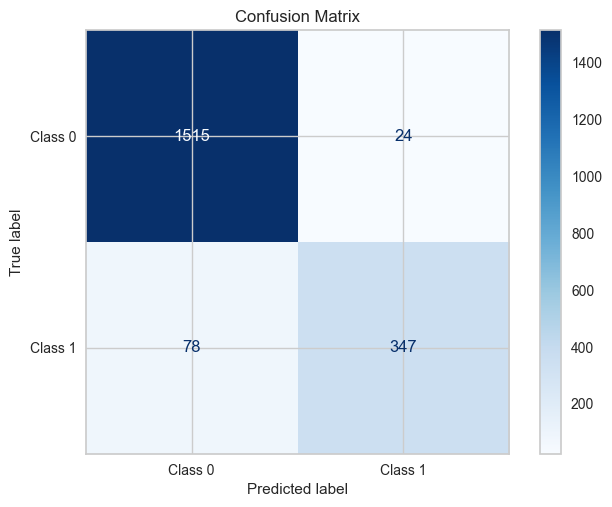

In [101]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [98]:
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

print("Falsos Negativos:")
false_negatives

Falsos Negativos:


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total ether balance,ERC20 total Ether sent contract,ERC20 min val rec,Actual,Predicted
9187,0.00,3.48,6.97,0,1,0,0.510000,0.700000,0.605000,0.000000,0.000000,0.000000,1.210000,0.0,0.00,1,0
8534,0.00,1001.16,173201.20,1,132,0,0.000000,0.100000,0.005325,0.000000,0.000000,0.000000,0.921265,0.0,0.00,1,0
8553,12.66,20.05,65.42,0,1,1,5.000000,10.000000,7.500000,5.000000,9.999000,7.499500,0.001000,0.0,0.00,1,0
9665,493.30,2346.71,446269.72,0,81,94,0.000250,2.000000,0.319439,0.039300,2.000000,0.384958,0.164796,0.0,0.00,1,0
9517,280.06,97592.18,293616.70,0,2,3,0.100740,0.312048,0.204863,0.100257,0.311565,0.204380,0.001449,0.0,13.37,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,7836.10,16.32,15802.73,0,6,2,0.990000,113.800000,24.918750,0.644000,198.685000,99.664500,0.021000,0.0,600.00,1,0
8359,0.00,0.00,2931.68,0,1,1,2.650000,2.650000,2.650000,2.649139,2.649139,2.649139,0.000861,0.0,0.00,1,0
8296,0.00,3141.88,56553.90,1,11,0,0.000000,2.900000,0.355687,0.000000,0.000000,0.000000,6.402364,0.0,0.00,1,0
9100,0.00,0.00,695.82,0,1,1,0.549912,0.549912,0.549912,0.549051,0.549051,0.549051,0.000861,0.0,0.00,1,0


In [102]:
with open('lgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)